In [ ]:
import os  # here we used os to interact with operating system It is often used to handle file and directory operations.
import numpy as np #  here numpy is used to convert images into in 1d array(ye kisi bhi multidimensional data ko array object mein badal deta h)
from PIL import Image # it is library used for manipulating images like opening images and resize
import matplotlib.pyplot as plt # matplotlib is used for visualizing the plot created by us
import cv2 #used for computer vision such as image processing.

In [ ]:
directory = "/content/drive/MyDrive/496g"


In [ ]:
image_arrays = []
mask_arrays = []
'''here we have created two empty array called image_array and mask_array'''

'here we have created two empty array called image_array and mask_array'

In [ ]:
# Get a list of all the image filenames
image_filenames = sorted(os.listdir(os.path.join(directory, "images")))
'''here first os library get all files inside directory and then joins images with directory with (os.path.join) then os.listdir will call all file names that joined with directory then sorted will sort the alphabatical order'''

# Iterate through the sorted image filenames and add their corresponding arrays to image_arrays
for filename in image_filenames:
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        image = np.array(Image.open(os.path.join(directory, "images", filename)))
        image_arrays.append(image)

        ''' here (hamne filename ka variable banaya h)  variable filename iterates through image_filenam and check for the filename(variable) has extension .png (we have png image)or not  then

         os.join.path creates full file path by adding directory images and filename variable

         (os.path.join(directory, "images", filename) creates a file path by joining together the directory variable (which specifies the directory where the images are stored), the string "images" (which is the name of the subdirectory containing the images), and the current filename variable (which specifies the name of the current image file being processed).

         Image.open() opens the image file located at the file path created in the previous step.

         Finally, np.array() converts the opened image into a NumPy array that can be manipulated using Python code. (matlab os.path.join directory ko images naam ki string ke saath jodta fir usko filename ke variable ke saath jodta h))

         image_arrays is a Python list that is being used to store NumPy arrays representing each image file. The append() method is called on this list to add the current image's NumPy array to the end of the list. '''


In [ ]:
# Get a list of all the mask filenames
mask_filenames = sorted(os.listdir(os.path.join(directory, "masks")))

# Iterate through the sorted mask filenames and add their corresponding arrays to mask_arrays
for filename in mask_filenames:
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        mask = np.array(Image.open(os.path.join(directory, "masks", filename)))
        mask = cv2.cvtColor(mask, 1) #here cv2 is used.cvtColor converts mask image from BGR to RGB because opencv opens image in BGR format
        mask_arrays.append(mask)

In [ ]:

# Convert the list of image and mask arrays to numpy arrays
image_arrays = np.array(image_arrays)
mask_arrays = np.array(mask_arrays)
''' here image and mask_arrays python list is converted into numpy array coz it is easy to perform operation on numpy array'''


' here image and mask_arrays python list is converted into numpy array coz it is easy to perform operation on numpy array'

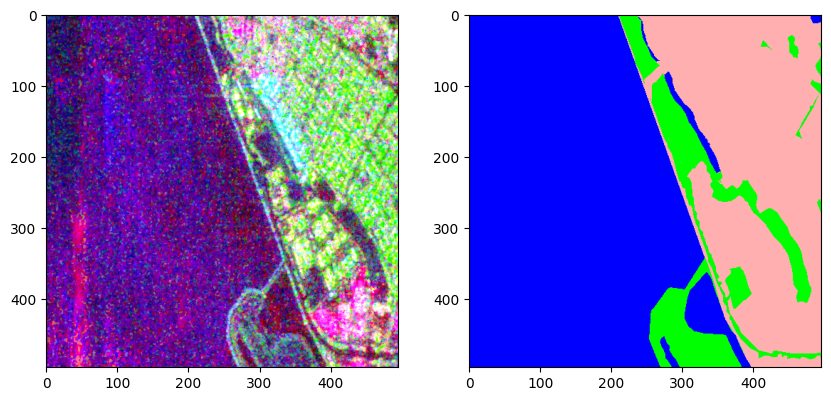

In [ ]:
#Checking whether images and masks are aligned correctly or not(means showing images with their corresponding masks)
import random#used to generate random number
image_number = random.randint(0, len(image_arrays))#here randit(function of random ) generates random integer between 0 to total no. of images in images_array(len calculates the total no. of images in image_array )
plt.figure(figsize=(10, 5)) # plt (matplotlib) create a figure of 10*5 inches
plt.subplot(121) # it creates (121) plot 1 from 2
plt.imshow(image_arrays[image_number]) # it shows a random images from image_array using imshow
plt.subplot(122) # it creates plot 2 of 2
plt.imshow(mask_arrays[image_number])# it shows a same random masks
plt.show() # show creates plot and show both image


In [ ]:


forest = '#0f510d'
forest = np.array([int(forest[i:i+2], 16) for i in (1, 3, 5)])


vegetation = '#00ff00'
vegetation = np.array([int(vegetation[i:i+2], 16) for i in (1, 3, 5)])




urban = '#ffafaf'
urban= np.array([int(urban[i:i+2], 16) for i in (1, 3, 5)])



water= '#0000ff'
water = np.array([int(water[i:i+2], 16) for i in (1, 3, 5)])


label = mask


''' here '#0f510d' stored in forest variable then [i:i+2] extract  each pair of hexadecimal characters from the color code string, which represents the red, green, and blue components of the color by the for loop which iterates 1,3,5 and
converts base 16 '#0f510d' into integer by the function called The int() function converts each pair to an integer, resulting in the list [15, 81, 13]
the np.array() function is used to create a NumPy array from the list of integers.



The int() function converts each pair of hexadecimal characters into an integer, and the np.array() function creates a NumPy array containing these three integers as elements.
These NumPy arrays can be used later to create a color-coded map of the land cover in the image data.



This line of code assigns the array mask to a new variable called label.
The mask array is likely an array of integers, with each integer representing a different class label for a corresponding pixel in an image.
By assigning the mask array to the label variable, we can use it later to create a color-coded mask where each class is represented by a different color.

 '''



" here '#0f510d' stored in forest variable then [i:i+2] extract  each pair of hexadecimal characters from the color code string, which represents the red, green, and blue components of the color by the for loop which iterates 1,3,5 and \nconverts base 16 '#0f510d' into integer by the function called The int() function converts each pair to an integer, resulting in the list [15, 81, 13] \nthe np.array() function is used to create a NumPy array from the list of integers.\n\n\n\nThe int() function converts each pair of hexadecimal characters into an integer, and the np.array() function creates a NumPy array containing these three integers as elements. \nThese NumPy arrays can be used later to create a color-coded map of the land cover in the image data.\n\n\n\nThis line of code assigns the array mask to a new variable called label.\nThe mask array is likely an array of integers, with each integer representing a different class label for a corresponding pixel in an image.\nBy assigning the

In [ ]:



def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format.
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8) # it creates numpy array label_seg with a shape of label and assigns all value to 0 with unsigned integer 8
    label_seg [np.all(label == forest,axis=-1)] = 0 # This line sets the value of label_seg to 0 where the input label array has the same RGB values as the forest variable.
    label_seg [np.all(label==vegetation,axis=-1)] = 1
    label_seg [np.all(label==urban,axis=-1)] = 2
    label_seg [np.all(label==water,axis=-1)] = 3


    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels

    return label_seg



In [ ]:

labels = []
for i in range(mask_arrays.shape[0]):
    label = rgb_to_2D_label(mask_arrays[i])
    labels.append(label)

labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)


In [ ]:

print("Unique labels in label dataset are: ", np.unique(labels))



Unique labels in label dataset are:  [0 1 2 3]


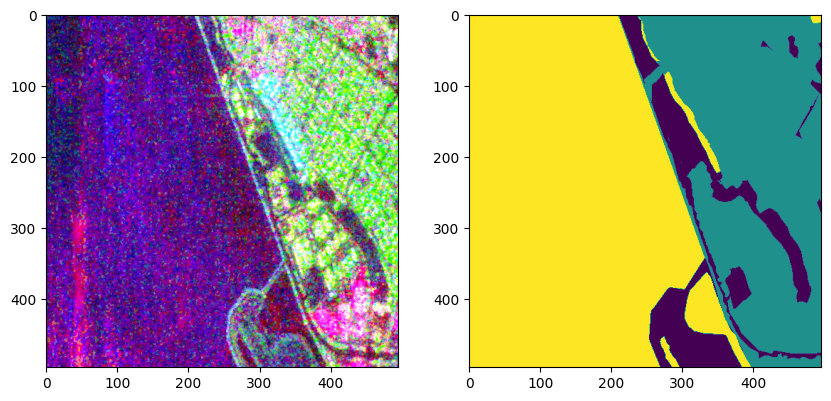

In [ ]:


#Another Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(image_arrays))
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image_arrays[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()


In [ ]:


n_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)



In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_arrays, labels_cat, test_size = 0.20, random_state = 72)



In [ ]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [ ]:

weights = [0.25, 0.25, 0.25, 0.25]
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)


In [ ]:

import keras.backend as K
from keras.utils import get_custom_objects

def dice_loss_plus_1focal_loss(y_true, y_pred):
    # custom loss function implementation
    pass

In [ ]:

# Register the custom loss function
get_custom_objects().update({'dice_loss_plus_1focal_loss': dice_loss_plus_1focal_loss})



In [ ]:

IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]





In [ ]:


from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)
    LR=0.0001

In [ ]:
def multi_unet_model(n_classes=4, IMG_HEIGHT=496, IMG_WIDTH=496, IMG_CHANNELS=3):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = BatchNormalization()(c1)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    c1 = BatchNormalization()(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = BatchNormalization()(c2)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    c2 = BatchNormalization()(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = BatchNormalization()(c3)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    c3 = BatchNormalization()(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = BatchNormalization()(c4)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    c4 = BatchNormalization()(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = BatchNormalization()(c5)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    c5 = BatchNormalization()(c5)
    #Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = BatchNormalization()(c6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = BatchNormalization()(c7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = BatchNormalization()(c8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = BatchNormalization()(c9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])

    #NOTE: Compile the model in the main program to make it easy to test with various loss functions
    #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    #model.summary()

    return model

In [ ]:

metrics=['accuracy', jacard_coef]

def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)


In [ ]:

model = get_model()
model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
#model.compile(optimizer='adam', loss=focal_loss, metrics=metrics)
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 496, 496, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 496, 496, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 496, 496, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
from keras.utils.vis_utils import plot_model

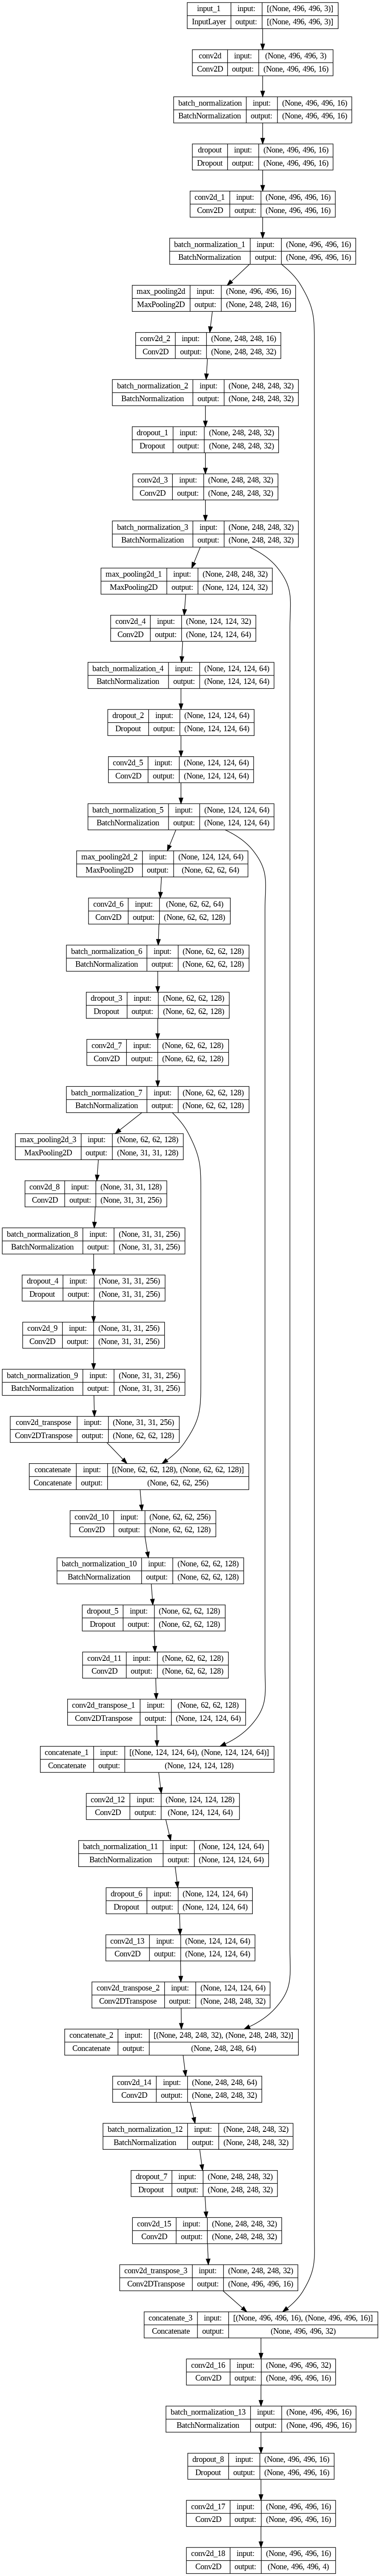

In [ ]:
plot_model(model,to_file="unet_model.png",show_shapes=True,show_layer_names=True)

In [ ]:


history1 = model.fit(X_train, y_train,
                    batch_size = 64,
                    verbose=1,
                    epochs=400,
                    validation_data=(X_test, y_test),
                    shuffle=False)

Epoch 1/400
1/1 [==============================] - 42s 42s/step - loss: 1.0588 - accuracy: 0.2875 - jacard_coef: 0.1516 - val_loss: 1.5899 - val_accuracy: 0.2482 - val_jacard_coef: 0.1413
Epoch 2/400
1/1 [==============================] - 1s 885ms/step - loss: 1.0402 - accuracy: 0.3064 - jacard_coef: 0.1715 - val_loss: 1.5527 - val_accuracy: 0.2367 - val_jacard_coef: 0.1342
Epoch 3/400
1/1 [==============================] - 1s 879ms/step - loss: 1.0237 - accuracy: 0.3240 - jacard_coef: 0.1900 - val_loss: 1.5437 - val_accuracy: 0.2247 - val_jacard_coef: 0.1268
Epoch 4/400
1/1 [==============================] - 1s 880ms/step - loss: 1.0086 - accuracy: 0.3456 - jacard_coef: 0.2078 - val_loss: 1.5504 - val_accuracy: 0.2241 - val_jacard_coef: 0.1260
Epoch 5/400
1/1 [==============================] - 1s 904ms/step - loss: 0.9950 - accuracy: 0.3708 - jacard_coef: 0.2249 - val_loss: 1.5705 - val_accuracy: 0.2172 - val_jacard_coef: 0.1219
Epoch 6/400
1/1 [==============================] - 1s 92

In [ ]:

model.save('models/satellite_standard_unet_with_50epochs496*496.hdf5')

In [ ]:

from keras.models import load_model
model = load_model("models/satellite_standard_unet_with_50epochs496*496.hdf5",
                   compile=False)




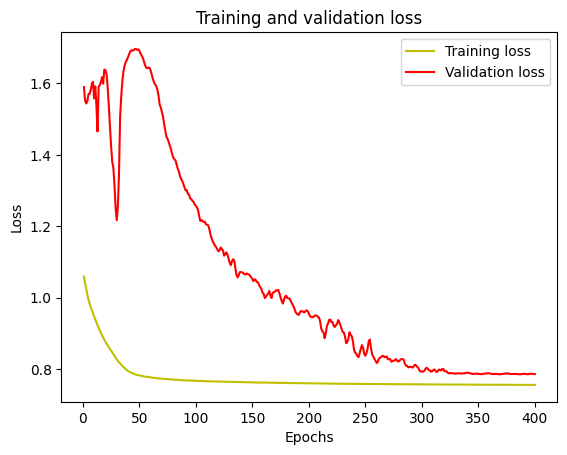

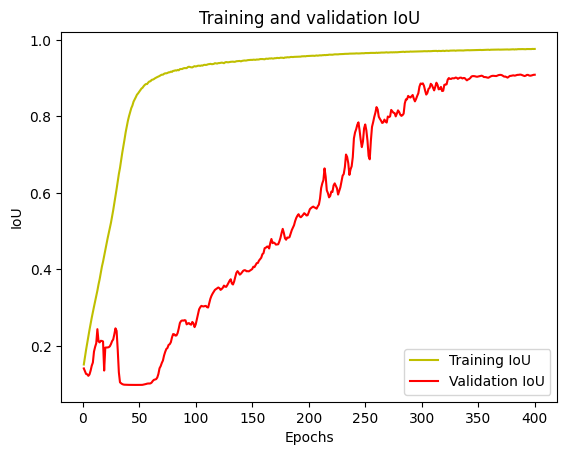

In [ ]:


history = history1
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

In [ ]:


#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)


#Using built in keras function for IoU
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

1/1 [==============================] - 0s 391ms/step
Mean IoU = 0.89193296


1/1 [==============================] - 1s 789ms/step


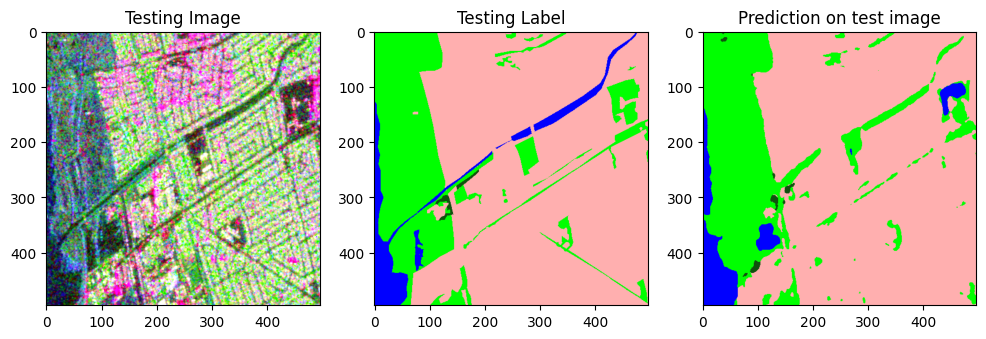

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth = y_test_argmax[test_img_number]
test_img_input = np.expand_dims(test_img, 0)
prediction = model.predict(test_img_input)
predicted_img = np.argmax(prediction, axis=3)[0, :, :]

# Define colors for each class (excluding background)
colors = [
    '#0f510d',  # class 1 (red)
    '#00ff00',
    '#ffafaf',
    '#0000ff'
    # class 2 (green)
    # add more colors for additional classes...
]

# Convert hex colors to RGB values
rgb_colors = [mcolors.hex2color(color) for color in colors]

# Map pixel values to colors for ground truth label
ground_truth_color = np.zeros((ground_truth.shape[0], ground_truth.shape[1], 3), dtype=np.uint8)
for i in range(len(colors)):
    mask = (ground_truth == i)
    ground_truth_color[mask] = np.array(rgb_colors[i]) * 255

# Convert predicted image to RGB format using the same colors
predicted_img_color = np.zeros((predicted_img.shape[0], predicted_img.shape[1], 3), dtype=np.uint8)
for i in range(len(colors)):
    mask = (predicted_img == i)
    predicted_img_color[mask] = np.array(rgb_colors[i]) * 255

# Plot images
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth_color)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img_color)
plt.show()


In [ ]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

# Calculate accuracy
accuracy = np.mean(y_pred_argmax == y_test_argmax)
print("Accuracy =", accuracy)


1/1 [==============================] - 0s 26ms/step
Accuracy = 0.9529725708896982


In [ ]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

# Calculate pixel accuracy
pixel_accuracy = np.sum(y_pred_argmax == y_test_argmax) / (y_test_argmax.shape[0] * y_test_argmax.shape[1] * y_test_argmax.shape[2])
print("Pixel accuracy =", pixel_accuracy)


1/1 [==============================] - 0s 22ms/step
Pixel accuracy = 0.9529725708896982


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive')


# Set the directory path to save the images
save_dir_16555 = '/content/drive/MyDrive'

if not os.path.exists('save_dir_16555'):
    os.makedirs('save_dir_16555')


for i in range(len(X_test)):
    test_img = X_test[i]
    ground_truth = y_test_argmax[i]
    test_img_input = np.expand_dims(test_img, 0)
    prediction = model.predict(test_img_input)
    predicted_img = np.argmax(prediction, axis=3)[0, :, :]

    # Define colors for each class (excluding background)
    colors = [
        '#0f510d',  # class 1 (red)
        '#00ff00',
        '#ffafaf',
        '#0000ff'
        # class 2 (green)
        # add more colors for additional classes...
    ]

    # Convert hex colors to RGB values
    rgb_colors = [mcolors.hex2color(color) for color in colors]

    # Map pixel values to colors for ground truth label
    ground_truth_color = np.zeros((ground_truth.shape[0], ground_truth.shape[1], 3), dtype=np.uint8)
    for j in range(len(colors)):
        mask = (ground_truth == j)
        ground_truth_color[mask] = np.array(rgb_colors[j]) * 255

    # Convert predicted image to RGB format using the same colors
    predicted_img_color = np.zeros((predicted_img.shape[0], predicted_img.shape[1], 3), dtype=np.uint8)
    for j in range(len(colors)):
        mask = (predicted_img == j)
        predicted_img_color[mask] = np.array(rgb_colors[j]) * 255

    # Save the images and labels
    filename = f'save_dir_16555/test_{i}.png'
    plt.figure(figsize=(12, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(test_img)
    plt.subplot(232)
    plt.title('Testing Label')
    plt.imshow(ground_truth_color)
    plt.subplot(233)
    plt.title('Prediction on test image')
    plt.imshow(predicted_img_color)
    plt.savefig(filename)
    plt.close()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 67ms/step


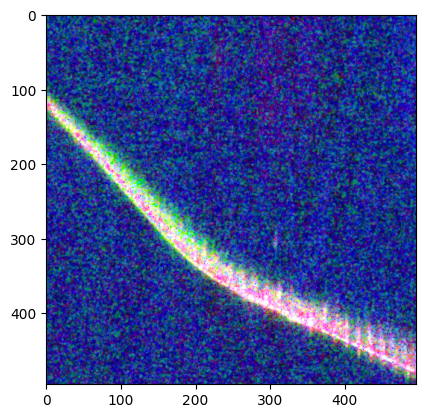

In [ ]:
plt.imshow(Image.open('/content/drive/MyDrive/test img/cropped_Bhattacharya_Frery_BF4_RGB.bmp.2000_2500.png_0_0.png'))

In [ ]:
image=Image.open('/content/drive/MyDrive/test img/cropped_Bhattacharya_Frery_BF4_RGB.bmp.6000_4500.png_0_0.png')
image=np.array(image)
image=np.expand_dims(image, 0)

In [ ]:
prediction = model.predict(image)
predicted_img = np.argmax(prediction,axis=3)[0, :, :]


1/1 [==============================] - 0s 47ms/step


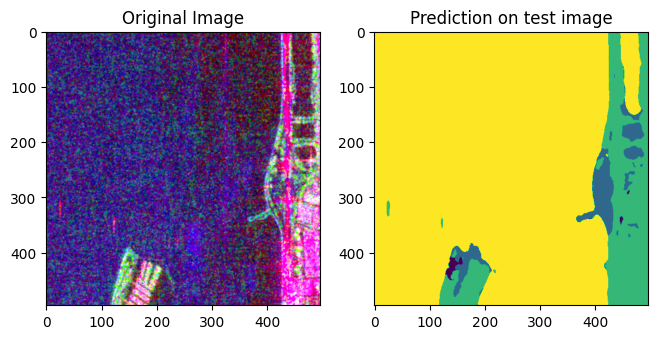

In [ ]:


# Plot images
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Original Image')
plt.imshow(Image.open('/content/drive/MyDrive/test img/cropped_Bhattacharya_Frery_BF4_RGB.bmp.6000_4500.png_0_0.png'))
plt.subplot(232)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()

1/1 [==============================] - 0s 43ms/step


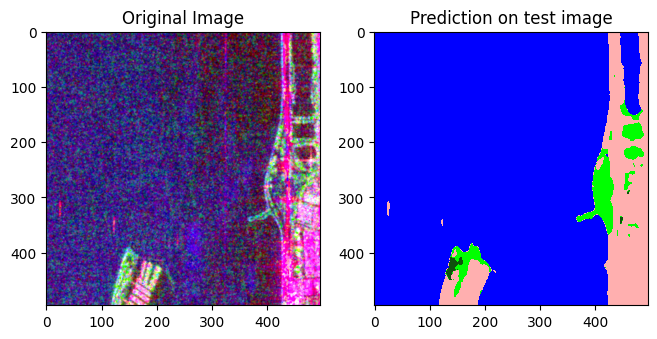

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Define colors for each class (excluding background)
colors = [
    '#0f510d',  # class 1 (red)
    '#00ff00',  # class 2 (green)
    '#ffafaf',  # class 3 (pink)
    '#0000ff'   # class 4 (blue)
    # add more colors for additional classes...
]

# Load the original image and the predicted image
original_img = Image.open('/content/drive/MyDrive/test img/cropped_Bhattacharya_Frery_BF4_RGB.bmp.6000_4500.png_0_0.png')
predicted_img = model.predict(image)  # assuming 'image' is the test image you want to predict

# Get the predicted class for each pixel
predicted_img = np.argmax(predicted_img, axis=-1)

# Create a color map using the colors list
cmap = mcolors.ListedColormap(colors)

# Plot the images
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Original Image')
plt.imshow(original_img)
plt.subplot(232)
plt.title('Prediction on test image')
plt.imshow(predicted_img[0,:,:], cmap=cmap)

plt.show()


In [ ]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keract as ke


In [ ]:
activations=ke.get_activations(model, image, nodes_to_evaluate=None, output_format='simple', auto_compile=True)


In [ ]:
ls -lah /content/activations


ls: cannot access '/content/activations': No such file or directory


input_1 (1, 496, 496, 3) 
conv2d (1, 496, 496, 16) 
batch_normalization (1, 496, 496, 16) 
dropout (1, 496, 496, 16) 
conv2d_1 (1, 496, 496, 16) 
batch_normalization_1 (1, 496, 496, 16) 
max_pooling2d (1, 248, 248, 16) 
conv2d_2 (1, 248, 248, 32) 
batch_normalization_2 (1, 248, 248, 32) 
dropout_1 (1, 248, 248, 32) 
conv2d_3 (1, 248, 248, 32) 
batch_normalization_3 (1, 248, 248, 32) 
max_pooling2d_1 (1, 124, 124, 32) 
conv2d_4 (1, 124, 124, 64) 
batch_normalization_4 (1, 124, 124, 64) 
dropout_2 (1, 124, 124, 64) 
conv2d_5 (1, 124, 124, 64) 
batch_normalization_5 (1, 124, 124, 64) 
max_pooling2d_2 (1, 62, 62, 64) 
conv2d_6 (1, 62, 62, 128) 
batch_normalization_6 (1, 62, 62, 128) 
dropout_3 (1, 62, 62, 128) 
conv2d_7 (1, 62, 62, 128) 
batch_normalization_7 (1, 62, 62, 128) 
max_pooling2d_3 (1, 31, 31, 128) 
conv2d_8 (1, 31, 31, 256) 
batch_normalization_8 (1, 31, 31, 256) 
dropout_4 (1, 31, 31, 256) 
conv2d_9 (1, 31, 31, 256) 
batch_normalization_9 (1, 31, 31, 256) 
conv2d_transpose (1,

KeyboardInterrupt: ignored

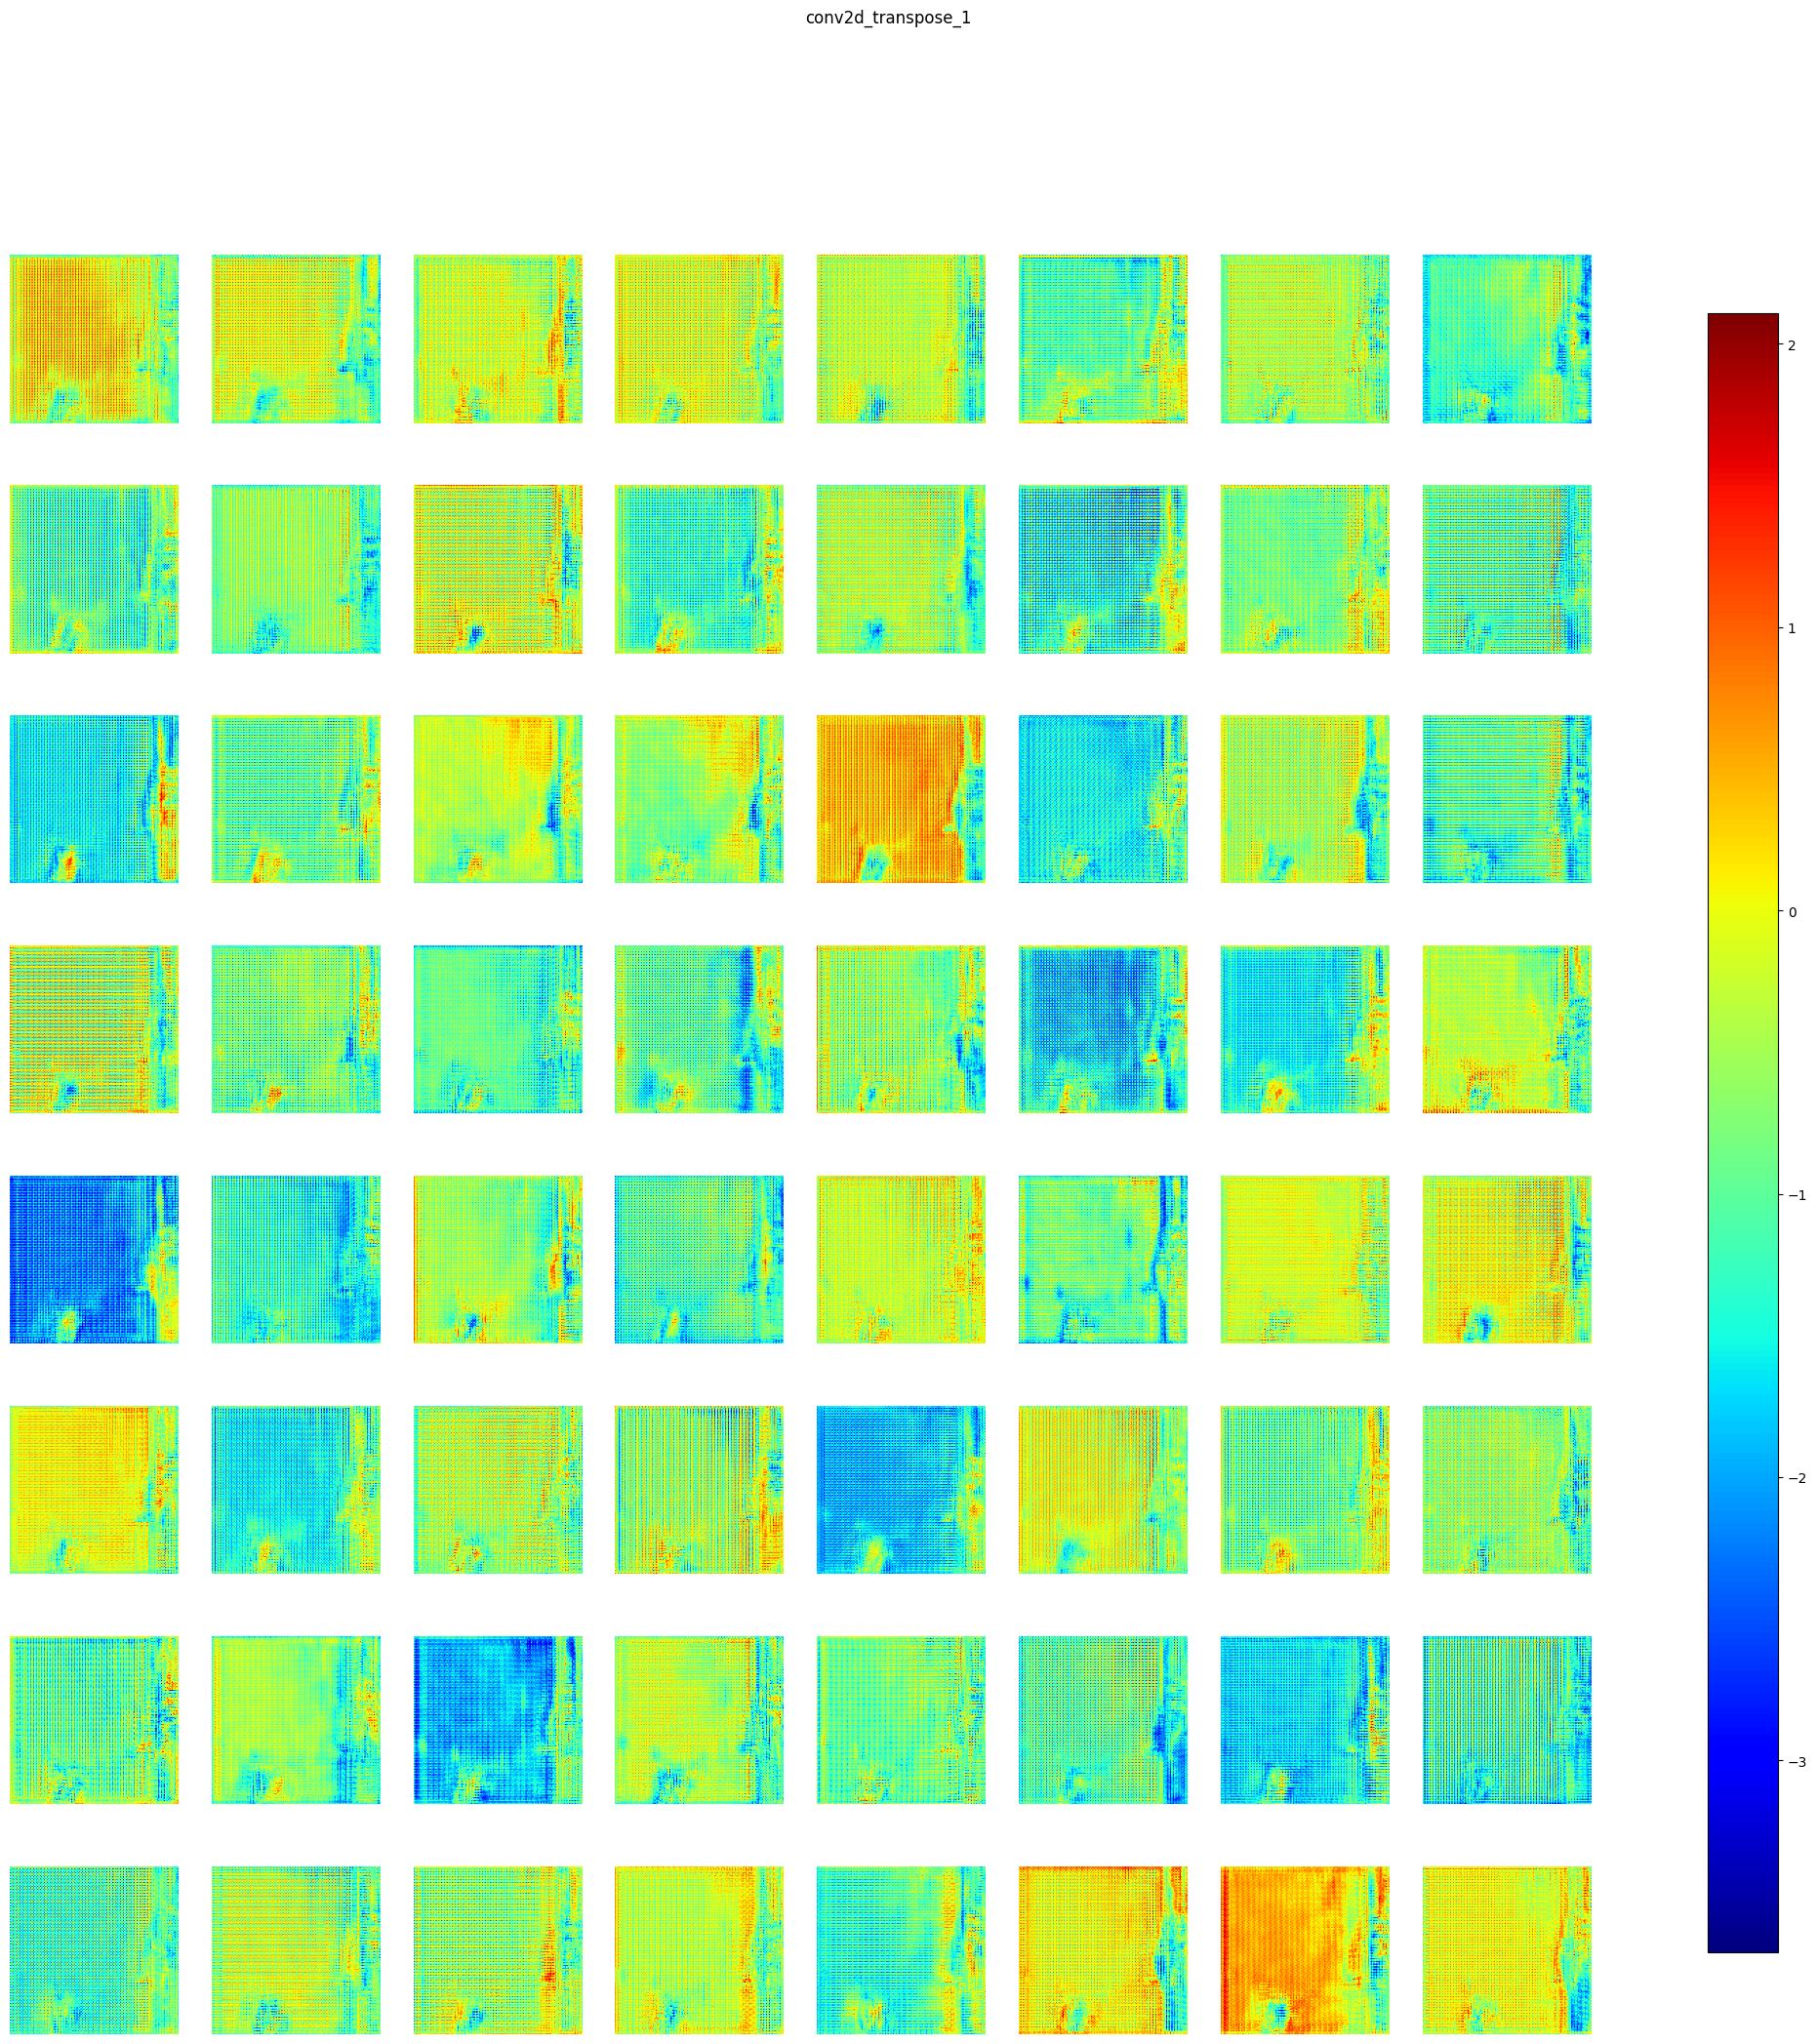

In [ ]:
ke.display_activations(activations, cmap='jet', save=True, directory='/content/activations')

In [ ]:
plt.imshow(Image.open('/content/activations/11_batch_normalization_3.png'))



In [ ]:
plt.imshow(Image.open('/content/activations/16_conv2d_5.png'))

In [ ]:
plt.imshow(Image.open('/content/activations/20_batch_normalization_6.png'))

In [ ]:
plt.imshow(Image.open('/content/activations/6_max_pooling2d.png'))


In [ ]:
image=Image.open('/content/drive/MyDrive/test img/cropped_Bhattacharya_Frery_BF4_RGB.bmp.2000_2500.png_0_0.png')
image=np.array(image)
image=image.astype(np.float32)



ke.display_heatmaps(activations,image,save=True, directory='/content/heatmap')